# K Means Clustering for Credit Card Segmentation

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CC_GENERAL.csv')
df.shape

(8950, 18)

In [3]:
df.head

<bound method NDFrame.head of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  P

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.describe(include=['object'])

,CUST_ID
count,8950
unique,8950
top,C14410
freq,1


##### Dropping CUST_ID as it has unique values and categeorical variable

In [9]:
data=df.drop('CUST_ID',axis=1)

In [10]:
#Handling Outliers
def outlier_capping(data):
    x = data.clip(upper=data.quantile(0.99), lower=data.quantile(0.01))
    return x

data=data.apply(lambda x: outlier_capping(x))

#### Treating missing values

In [14]:
data['CREDIT_LIMIT'].fillna(value=data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(value=data['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [15]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
data.shape

(8950, 17)

In [16]:
## Scaling if in case of range difference in the given data

from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(data)

In [18]:
#The Class code column is the value that needs to be predicted from the analysis. 
#Hence we will have to split X and y(Features and labels) based on this information
X = data.iloc[:,0:17]  # all rows, all the features and no labels

In [19]:
#Find the covarience matrix which is : X.T*X
sample_data=scaled_data 

In [20]:
#Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

In [21]:
print("The shape of variance matrix is : ",covar_matrix.shape)

The shape of variance matrix is :  (17, 17)


In [22]:
#Finding top two eigen value and corresponding eigen vectors
#for projecting onto a 2-Dimension space.

from scipy.linalg import eigh

#The parameter 'eigvals' is defined(low value to high value)
#eigh function will return the eigen value in ascending order
#this code generates only top two eigen values 

values,vectors=eigh(covar_matrix,eigvals=(15,16))

print("The shape of eigen vectors = ",vectors.shape)
#converting the eigen vectors into (2,d) shape for easyness of further computations
vectors=vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
#here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
#here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

The shape of eigen vectors =  (17, 2)
Updated shape of eigen vectors =  (2, 17)


In [23]:
#projecting the original data sample on the plane .
#formed by two principal eigen vectors by vector-vector multiplication
new_coordinates=np.matmul(vectors,sample_data.T)

print("Resultant new data points shape ",vectors.shape,"X",sample_data.T.shape," = ",new_coordinates.shape)

Resultant new data points shape  (2, 17) X (17, 8950)  =  (2, 8950)


In [25]:
#Creating the Dataframe having 1st principal & 2nd principal

#creating new_dataframe for plotting labeled points
df=pd.DataFrame(data=new_coordinates.T,columns=['1st principal','2nd principal'])
df.head()

,1st principal,2nd principal
0,1.423577,1.764253
1,-2.705609,1.536339
2,0.291647,-1.033585
3,0.127441,0.808836
4,0.987010,1.714508


## Applying Kmeans Algorithm

In [26]:
# Using Elbow Method to find Optimal number of clusters

wcss=[]

for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

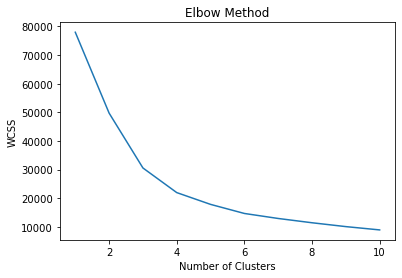

In [27]:
# Plot for Elbow Method

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# considering number of clusters=3
# Fitting Kmeans to dataset
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=0)
y_clusters=kmeans.fit_predict(df)

In [32]:
#visualize the clusters
df['clusters']=y_clusters
d1=df[df.clusters==0]
d2=df[df.clusters==1]
d3=df[df.clusters==2]

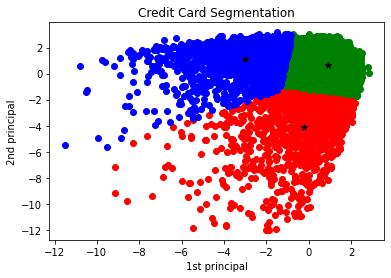

In [33]:
plt.scatter(d1['1st principal'], d1['2nd principal'], color='green')
plt.scatter(d2['1st principal'], d2['2nd principal'], color='red')
plt.scatter(d3['1st principal'], d3['2nd principal'], color='blue')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', label='centroid', color='black')

plt.title('Credit Card Segmentation')
plt.xlabel('1st principal')
plt.ylabel('2nd principal')
plt.show()